# Task 3 - Experience Analytics


### Task 3.1 - Aggregate, per customer, the following information:
• Average TCP retransmission

• Average RTT

• Handset type

• Average throughput

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the dataset
df=pd.read_csv('telcom_data.csv')

In [3]:
df.shape

(150001, 55)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

# Task 3.1

### Aggregate, per customer, the following information (treat missing & outliers by replacing with the mean or the mode of the corresponding variable):

In [5]:
# Average TCP retransmission 
df['Avg_TCP_Retransmission'] = (df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']) / 2
df['Avg_TCP_Retransmission']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
149996   NaN
149997   NaN
149998   NaN
149999   NaN
150000   NaN
Name: Avg_TCP_Retransmission, Length: 150001, dtype: float64

In [6]:
# Replace missing values with the mean
df_filled = df.fillna(df.mean())

# Calculate the mean and standard deviation for outlier detection
mean = df_filled['Avg_TCP_Retransmission'].mean()
std = df_filled['Avg_TCP_Retransmission'].std()

# Replace outliers with the mean
df_filled['Avg_TCP_Retransmission'] = np.where(
    np.abs(df_filled['Avg_TCP_Retransmission'] - mean) > 3 * std,
    mean,
    df_filled['Avg_TCP_Retransmission']
)

print(df_filled['Avg_TCP_Retransmission'])

0         1.285848e+07
1         1.285848e+07
2         1.285848e+07
3         1.285848e+07
4         1.285848e+07
              ...     
149996    1.285848e+07
149997    1.285848e+07
149998    1.285848e+07
149999    1.285848e+07
150000    1.285848e+07
Name: Avg_TCP_Retransmission, Length: 150001, dtype: float64


In [7]:
# Average RTT
df['Avg_RTT'] = (df['Avg RTT DL (ms)'] + df['Avg RTT UL (ms)']) / 2
df['Avg_RTT']

0         23.5
1         35.0
2          NaN
3          NaN
4          NaN
          ... 
149996    16.0
149997    14.5
149998    24.5
149999    21.0
150000     NaN
Name: Avg_RTT, Length: 150001, dtype: float64

In [8]:
# Replace missing values with the mean
df_filled = df.fillna(df.mean())

# Calculate the mean and standard deviation for outlier detection
mean = df_filled['Avg_RTT'].mean()
std = df_filled['Avg_RTT'].std()

# Replace outliers with the mean
df_filled['Avg_RTT'] = np.where(
    np.abs(df_filled['Avg_RTT'] - mean) > 3 * std,
    mean,
    df_filled['Avg_RTT']
)

print(df_filled['Avg_RTT'])

0         23.500000
1         35.000000
2         63.512443
3         63.512443
4         63.512443
            ...    
149996    16.000000
149997    14.500000
149998    24.500000
149999    21.000000
150000    63.512443
Name: Avg_RTT, Length: 150001, dtype: float64


In [9]:
# Calculate the mode of 'Handset Type' for each unique 'MSISDN/Number'
handset_type_mode = df.groupby('MSISDN/Number')['Handset Type'].agg(lambda x: x.mode()[0])

# Create a new DataFrame with the mode values
handset_type_df = pd.DataFrame({'MSISDN/Number': handset_type_mode.index, 'Handset Type': handset_type_mode.values})

handset_type_df

,MSISDN/Number,Handset Type
0,3.360100e+10,Huawei P20 Lite Huawei Nova 3E
1,3.360100e+10,Apple iPhone 7 (A1778)
2,3.360100e+10,undefined
3,3.360101e+10,Apple iPhone 5S (A1457)
4,3.360101e+10,Apple iPhone Se (A1723)
...,...,...
106851,3.379000e+10,Huawei Honor 9 Lite
106852,3.379000e+10,Apple iPhone 8 Plus (A1897)
106853,3.197020e+12,Quectel Wireless. Quectel Ec25-E
106854,3.370000e+14,Huawei B525S-23A


In [10]:
#Average throughput
df['Avg_Throughput'] = (df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']) / 2
df['Avg_Throughput']

0         33.5
1         21.0
2          7.5
3         44.0
4          7.5
          ... 
149996    58.5
149997    38.5
149998    45.0
149999    35.5
150000     NaN
Name: Avg_Throughput, Length: 150001, dtype: float64

In [11]:
# Replace missing values with the mean
df_filled = df.fillna(df.mean())

# Calculate the mean and standard deviation for outlier detection
mean = df_filled['Avg_Throughput'].mean()
std = df_filled['Avg_Throughput'].std()

# Replace outliers with the mean
df_filled['Avg_Throughput'] = np.where(
    np.abs(df_filled['Avg_Throughput'] - mean) > 3 * std,
    mean,
    df_filled['Avg_Throughput']
)

print(df_filled['Avg_Throughput'])

0           33.500000
1           21.000000
2            7.500000
3           44.000000
4            7.500000
             ...     
149996      58.500000
149997      38.500000
149998      45.000000
149999      35.500000
150000    7535.237287
Name: Avg_Throughput, Length: 150001, dtype: float64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 58 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [13]:
# Aggregate the information per customer
grouped_df = df.groupby('MSISDN/Number').agg({
    'Avg_TCP_Retransmission': 'mean',
    'Avg_RTT': 'mean',
    'Handset Type': lambda x: x.mode()[0],
    'Avg_Throughput': 'mean'
})

grouped_df

,Avg_TCP_Retransmission,Avg_RTT,Handset Type,Avg_Throughput
MSISDN/Number,,,,
3.360100e+10,NaN,23.00,Huawei P20 Lite Huawei Nova 3E,38.0
3.360100e+10,NaN,15.50,Apple iPhone 7 (A1778),49.5
3.360100e+10,NaN,NaN,undefined,48.5
3.360101e+10,NaN,42.00,Apple iPhone 5S (A1457),124.0
3.360101e+10,4685416.0,29.75,Apple iPhone Se (A1723),14211.0
...,...,...,...,...
3.379000e+10,109022.5,26.00,Huawei Honor 9 Lite,5182.5
3.379000e+10,NaN,20.00,Apple iPhone 8 Plus (A1897),58.0
3.197020e+12,NaN,NaN,Quectel Wireless. Quectel Ec25-E,0.5


# Task 3.2 

### Compute & list 10 of the top, bottom and most frequent:

### a. TCP values in the dataset.

In [14]:
# Top 10 TCP values
top_10_tcp_values = df['Avg_TCP_Retransmission'].nlargest(10)
print("Top 10 TCP values:")
print(top_10_tcp_values)

# Bottom 10 TCP values
bottom_10_tcp_values = df['Avg_TCP_Retransmission'].nsmallest(10)
print("\nBottom 10 TCP values:")
print(bottom_10_tcp_values)

# Most frequent TCP values
most_frequent_tcp_values = df['Avg_TCP_Retransmission'].value_counts().head(10)
print("\nMost frequent TCP values:")
print(most_frequent_tcp_values)

Top 10 TCP values:
34636     2.172058e+09
140797    2.150739e+09
77950     2.147216e+09
135677    2.145732e+09
3741      2.144060e+09
119667    2.137746e+09
39608     2.134324e+09
59011     2.130808e+09
76971     2.130087e+09
41182     2.127330e+09
Name: Avg_TCP_Retransmission, dtype: float64

Bottom 10 TCP values:
143594    43.0
111100    48.5
18417     53.0
13142     54.0
97061     56.5
8794      64.0
99947     64.5
83214     67.0
95955     67.0
12849     71.5
Name: Avg_TCP_Retransmission, dtype: float64

Most frequent TCP values:
1330.0    29
2660.0    24
3325.0    20
1995.0    19
3990.0    14
936.5     13
7980.0     9
1324.0     9
5320.0     8
1376.0     8
Name: Avg_TCP_Retransmission, dtype: int64


### b. RTT values in the dataset.

In [15]:
# Top 10 RTT values
top_10_RTT_values = df['Avg_RTT'].nlargest(10)
print("Top 10 RTT values:")
print(top_10_RTT_values)

# Bottom 10 RTT values
bottom_10_RTT_values = df['Avg_RTT'].nsmallest(10)
print("\nBottom 10 RTT values:")
print(bottom_10_RTT_values)

# Most frequent RTT values
most_frequent_RTT_values = df['Avg_RTT'].value_counts().head(10)
print("\nMost frequent RTT values:")
print(most_frequent_RTT_values)

Top 10 RTT values:
30155     48462.0
29916     32320.5
17894     27906.0
5963      27424.0
22839     13639.0
23442     13150.0
1361      12961.0
81256     12857.5
97312     12694.0
100575    12369.0
Name: Avg_RTT, dtype: float64

Bottom 10 RTT values:
42602     0.0
103321    0.0
124538    0.0
143878    0.0
71738     1.0
50966     2.0
144923    2.0
103544    2.5
8756      3.0
123210    3.0
Name: Avg_RTT, dtype: float64

Most frequent RTT values:
14.5    4993
19.5    4222
19.0    2761
20.0    2647
15.0    2592
14.0    2424
24.5    2219
20.5    1978
15.5    1960
24.0    1855
Name: Avg_RTT, dtype: int64


### c. Throughput values in the dataset.

In [16]:
# Top 10 Throughput values
top_10_Throughput_values = df['Avg_Throughput'].nlargest(10)
print("Top 10 Throughput values:")
print(top_10_Throughput_values)

# Bottom 10 Throughput values
bottom_10_Throughput_values = df['Avg_Throughput'].nsmallest(10)
print("\nBottom 10 Throughput values:")
print(bottom_10_Throughput_values)

# Most frequent Throughput values
most_frequent_Throughput_values = df['Avg_Throughput'].value_counts().head(10)
print("\nMost frequent Throughput values:")
print(most_frequent_Throughput_values)

Top 10 Throughput values:
120876    191131.0
143670    156622.0
141250    152149.5
91298     150273.0
116794    141965.5
141449    140572.0
149616    138576.0
92177     138102.5
116550    137026.0
117776    134944.0
Name: Avg_Throughput, dtype: float64

Bottom 10 Throughput values:
148     0.0
614     0.0
2460    0.0
3893    0.0
4129    0.0
4822    0.0
5796    0.0
5961    0.0
6135    0.0
7186    0.0
Name: Avg_Throughput, dtype: float64

Most frequent Throughput values:
31.5    3886
7.5     3741
48.5    1945
45.0    1885
49.0    1801
48.0    1671
49.5    1571
44.5    1557
45.5    1520
46.5    1491
Name: Avg_Throughput, dtype: int64


# Task 3.3

### d. The distribution of the average throughput per handset type

In [17]:
throughput_per_handset = df['Avg_Throughput'].groupby(df['Handset Type']).mean()
throughput_per_handset

Handset Type
A-Link Telecom I. Cubot A5                                                             11755.000000
A-Link Telecom I. Cubot Note Plus                                                       3349.500000
A-Link Telecom I. Cubot Note S                                                          4468.500000
A-Link Telecom I. Cubot Nova                                                           28108.500000
A-Link Telecom I. Cubot Power                                                          34734.000000
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809       29.000000
Zyxel Communicat. Lte7460                                                              30978.000000
Zyxel Communicat. Sbg3600                                                              48675.500000
Zyxel Communicat. Zyxel Wah7706                                                        

In [18]:
top_10_throughput_per_handset = throughput_per_handset.sort_values(ascending=False).head(10)
print(top_10_throughput_per_handset)

Handset Type
Huawei B715S-23C               54497.115385
New-Bund Technol. Mix 2        52605.500000
Lg G6+                         50067.500000
Zyxel Communicat. Sbg3600      48675.500000
Huawei Y9 2019                 45869.500000
Xiaomi Communica. M1902F1G     42806.833333
Spa Condor Elect. Allure M2    42155.750000
Ovvi-Cellphone T. Echo         39476.500000
Huawei Pele                    39190.500000
Spa Condor Elect. Plume L2     38264.500000
Name: Avg_Throughput, dtype: float64


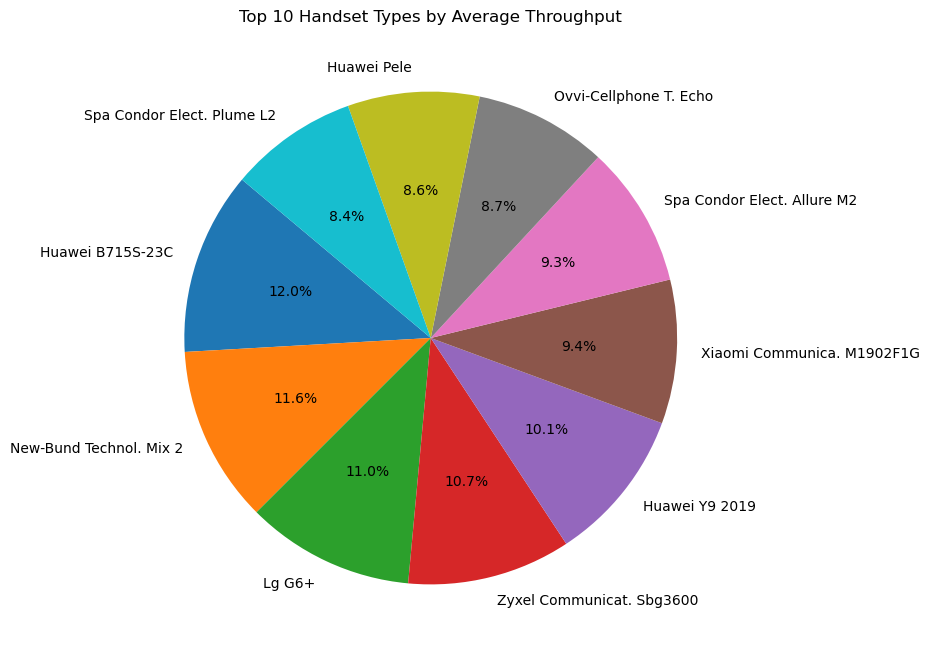

In [19]:
# Assuming top_10_throughput_per_handset is a Series with the handset types as the index and the average throughput as the values
labels = top_10_throughput_per_handset.index
sizes = top_10_throughput_per_handset.values

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size (optional, adjust as needed)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Set the title
plt.title('Top 10 Handset Types by Average Throughput')

# Display the plot
plt.show()

## e. The average TCP retransmission view per handset

In [20]:
TCP_per_handset =  df['Avg_TCP_Retransmission'].groupby(df['Handset Type']).mean()
TCP_per_handset 

Handset Type
A-Link Telecom I. Cubot A5                                                                      NaN
A-Link Telecom I. Cubot Note Plus                                                      3.081065e+05
A-Link Telecom I. Cubot Note S                                                         2.070587e+07
A-Link Telecom I. Cubot Nova                                                           6.858500e+04
A-Link Telecom I. Cubot Power                                                          4.020500e+03
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809             NaN
Zyxel Communicat. Lte7460                                                              2.063827e+07
Zyxel Communicat. Sbg3600                                                              2.674347e+07
Zyxel Communicat. Zyxel Wah7706                                                        

In [21]:
TCP_per_handset = df['Avg_TCP_Retransmission'].fillna(df['Avg_TCP_Retransmission'].mean()).groupby(df['Handset Type']).mean()
TCP_per_handset 

Handset Type
A-Link Telecom I. Cubot A5                                                             1.285848e+07
A-Link Telecom I. Cubot Note Plus                                                      3.081065e+05
A-Link Telecom I. Cubot Note S                                                         2.070587e+07
A-Link Telecom I. Cubot Nova                                                           6.858500e+04
A-Link Telecom I. Cubot Power                                                          4.020500e+03
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809    1.285848e+07
Zyxel Communicat. Lte7460                                                              2.063827e+07
Zyxel Communicat. Sbg3600                                                              2.674347e+07
Zyxel Communicat. Zyxel Wah7706                                                        

In [22]:
top_10_TCP_per_handset = TCP_per_handset.sort_values(ascending=False).head(10)
print(top_10_TCP_per_handset)

Handset Type
Huawei Bln-Al10                              1.645873e+08
Asustek Asus Zenfone Selfie Zd551Kl          1.608292e+08
Samsung Galaxy Tab S3 (Sm-T825)              1.038853e+08
Huawei E5776S-32                             8.611504e+07
Apple iPad Pro (A1652)                       6.917633e+07
Samsung Galaxy J8 2018                       5.787917e+07
Dynamic Tech Hol. D-Mobile I3 I5 I7 I8 I9    5.329110e+07
Xiaomi Communica. Mi 6                       3.769354e+07
Huawei E5573                                 3.493472e+07
Huawei Y7 Prime 2018                         3.265211e+07
Name: Avg_TCP_Retransmission, dtype: float64


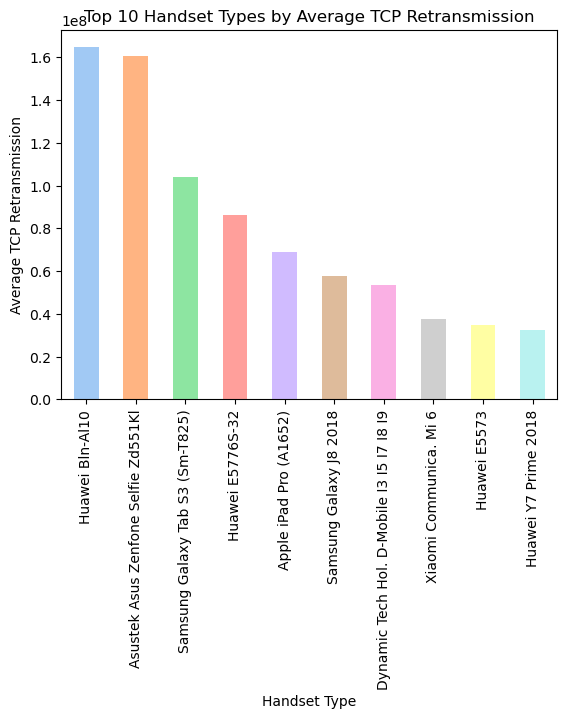

In [23]:
# Create a bar plot with custom colors
colors = sns.color_palette('pastel')
top_10_TCP_per_handset.plot(kind='bar', color=colors)


# Add axis labels and a title
plt.xlabel('Handset Type')
plt.ylabel('Average TCP Retransmission')
plt.title('Top 10 Handset Types by Average TCP Retransmission')

plt.show()

# Task 3.4

### Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster.

In [24]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Avg_TCP_Retransmission,Avg_RTT,Avg_Throughput
0,1.311450e+19,04-04-2019 12:01,770.0,25-04-2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0,NaN,23.5,33.5
1,1.311450e+19,09-04-2019 13:04,235.0,25-04-2019 08:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0,NaN,35.0,21.0
2,1.311450e+19,09-04-2019 17:42,1.0,25-04-2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0,NaN,NaN,7.5
3,1.311450e+19,10-04-2019 00:31,486.0,25-04-2019 07:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0,NaN,NaN,44.0
4,1.311450e+19,12-04-2019 20:10,565.0,25-04-2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0,NaN,NaN,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,29-04-2019 07:28,451.0,30-04-2019 06:02,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0,NaN,16.0,58.5
149997,7.349880e+18,29-04-2019 07:28,483.0,30-04-2019 10:41,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0,NaN,14.5,38.5
149998,1.311450e+19,29-04-2019 07:28,283.0,30-04-2019 10:46,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0,NaN,24.5,45.0
149999,1.311450e+19,29-04-2019 07:28,696.0,30-04-2019 10:40,327.0,97910.0,2.082020e+14,3.361962e+10,8.618620e+13,L88342B,...,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0,NaN,21.0,35.5


In [25]:
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [26]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i].fillna(df[i].mode()[0],inplace=True)
    else:
        df[i].fillna(df[i].mean(),inplace=True)

In [27]:
df.fillna(df[['Avg_TCP_Retransmission','Avg_RTT','Avg_Throughput' ]].mean(), inplace=True)

df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Avg_TCP_Retransmission,Avg_RTT,Avg_Throughput
0,1.311450e+19,04-04-2019 12:01,770.0000,25-04-2019 14:35,662.00000,1.823652e+06,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,3.674974e+07,3.088796e+08,1.285848e+07,23.500000,33.500000
1,1.311450e+19,09-04-2019 13:04,235.0000,25-04-2019 08:15,606.00000,1.365104e+06,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,5.380039e+07,6.533850e+08,1.285848e+07,35.000000,21.000000
2,1.311450e+19,09-04-2019 17:42,1.0000,25-04-2019 11:58,652.00000,1.361762e+06,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06,2.788364e+07,2.798073e+08,1.285848e+07,63.512443,7.500000
3,1.311450e+19,10-04-2019 00:31,486.0000,25-04-2019 07:36,171.00000,1.321509e+06,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07,4.332422e+07,8.460285e+08,1.285848e+07,63.512443,44.000000
4,1.311450e+19,12-04-2019 20:10,565.0000,25-04-2019 10:40,954.00000,1.089009e+06,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07,3.854281e+07,5.691386e+08,1.285848e+07,63.512443,7.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,29-04-2019 07:28,451.0000,30-04-2019 06:02,214.00000,8.123000e+04,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,5.762885e+07,5.741753e+08,1.285848e+07,16.000000,58.500000
149997,7.349880e+18,29-04-2019 07:28,483.0000,30-04-2019 10:41,187.00000,9.797000e+04,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,3.913508e+07,6.666488e+08,1.285848e+07,14.500000,38.500000
149998,1.311450e+19,29-04-2019 07:28,283.0000,30-04-2019 10:46,810.00000,9.824900e+04,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,3.491222e+07,5.927864e+08,1.285848e+07,24.500000,45.000000
149999,1.311450e+19,29-04-2019 07:28,696.0000,30-04-2019 10:40,327.00000,9.791000e+04,2.082020e+14,3.361962e+10,8.618620e+13,L88342B,...,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,2.962610e+07,3.718959e+08,1.285848e+07,21.000000,35.500000


In [28]:
df.isnull().sum().sum()

0

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Select the relevant experience metrics for clustering
experience_metrics = df[['Avg_Throughput', 'Avg_RTT', 'Avg_TCP_Retransmission']]

# Perform scaling or normalization 
scaler = MinMaxScaler()
experience_metrics = pd.DataFrame(scaler.fit_transform(df[['Avg_TCP_Retransmission', 'Avg_RTT', 'Avg_Throughput']]), columns=['Avg_TCP_Retransmission', 'Avg_RTT', 'Avg_Throughput'], index=df.index)

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(experience_metrics)

# Get the cluster labels for each user
df['cluster'] = kmeans.labels_
df['cluster']

0         0
1         0
2         0
3         0
4         0
         ..
149996    0
149997    0
149998    0
149999    0
150000    0
Name: cluster, Length: 150001, dtype: int32

In [30]:
# Group the DataFrame by the 'cluster' column
cluster_groups = df.groupby('cluster')

# Iterate through each cluster and describe its characteristics
for i, cluster_df in cluster_groups:
    print(f'\nCluster {i}:')
    print(f'  Size: {len(cluster_df)}')
    print(f'  Average TCP Retransmission: {cluster_df["Avg_TCP_Retransmission"].mean()}')
    print(f'  Average RTT: {cluster_df["Avg_RTT"].mean()}')
    print(f'  Average Throughput: {cluster_df["Avg_Throughput"].mean()}')


Cluster 0:
  Size: 111688
  Average TCP Retransmission: 11485846.92443623
  Average RTT: 65.9449518073009
  Average Throughput: 1053.950883150264

Cluster 1:
  Size: 8293
  Average TCP Retransmission: 46600815.336276285
  Average RTT: 48.67002441126206
  Average Throughput: 47983.35608344387

Cluster 2:
  Size: 30020
  Average TCP Retransmission: 8644020.680662379
  Average RTT: 58.56261199145124
  Average Throughput: 20474.799800133245


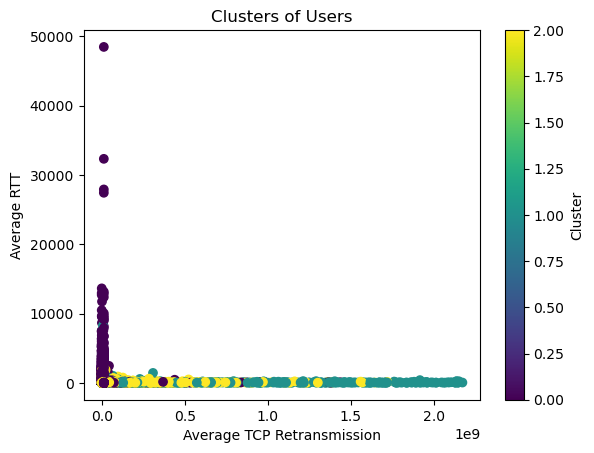

In [31]:
import matplotlib.pyplot as plt

# Scatter plot of TCP Retransmission vs RTT
plt.scatter(df['Avg_TCP_Retransmission'], df['Avg_RTT'], c=df['cluster'], cmap='viridis')

# Add labels and a title
plt.xlabel('Average TCP Retransmission')
plt.ylabel('Average RTT')
plt.title('Clusters of Users')

# Add a colorbar legend
cbar = plt.colorbar()
cbar.set_label('Cluster')

# Show the plot
plt.show()

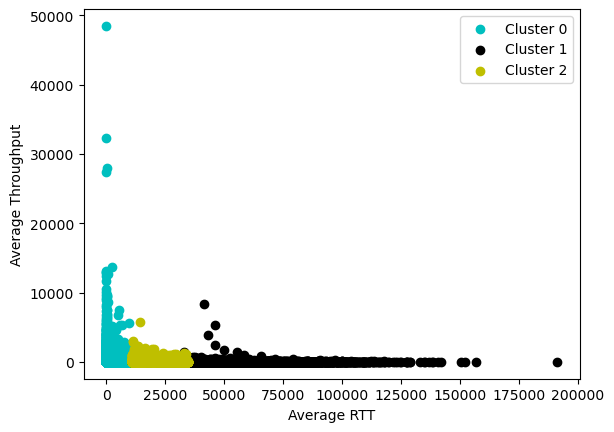

In [32]:
fig, ax = plt.subplots()

colors = ['c', 'k', 'y']

for i in range(3):
    cluster_df = df[df['cluster'] == i]
    x = cluster_df['Avg_Throughput']
    y = cluster_df['Avg_RTT']
    ax.scatter(x, y, c=colors[i], label=f'Cluster {i}')

ax.set_xlabel('Average RTT')
ax.set_ylabel('Average Throughput')
ax.legend()

plt.show()